In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.6f}'.format

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)
import matplotlib.pyplot as plt

# plt.rc('font', family='NanumBarunGothic')

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')

In [239]:
var = pd.read_csv('/content/drive/MyDrive/ubion_finance/Datasets/var_dataset.csv', index_col = 0)
# train = pd.read_csv('/content/drive/MyDrive/ubion_finance/Datasets/var_train_dataset.csv', index_col = 0)
var

,예측,실제,실제종가,예측종가
2020-05,-0.172017,0.116203,1047.710000,882.134581
2020-06,-0.064068,0.098670,1156.360000,1084.598105
2020-07,0.131732,-0.033584,1118.170000,1275.611035
2020-08,0.016786,0.081749,1213.420000,1233.959921
2020-09,0.051659,0.160504,1424.680000,1500.211939
2020-10,-0.109003,0.030546,1468.870000,1317.176433
2020-11,-0.058545,-0.035161,1418.120000,1337.479199
2020-12,0.028292,0.096859,1562.350000,1607.183327
2021-01,0.089120,0.102901,1731.680000,1893.093402
2021-02,0.064963,0.124357,1960.990000,2092.611453


In [240]:
var.index= pd.to_datetime(var.index)
# train.index= pd.to_datetime(train.index)

In [241]:
var.index

DatetimeIndex(['2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01'],
              dtype='datetime64[ns]', freq=None)

In [242]:
# train.index

In [243]:
# 시간과 종가만의 데이터프레임 생성
price_df = var[['실제종가','예측종가']]

In [244]:
price_df.tail(5)

,실제종가,예측종가
2022-12-01,1435.740000,1481.031828
2023-01-01,1343.910000,1368.464637
2023-02-01,1439.490000,1524.748693
2023-03-01,1488.620000,1495.495531
2023-04-01,1487.660000,1459.448825


In [245]:
# price_df = price_df.rename(columns={'예측종가': '종가'})

In [246]:
# df = pd.concat([train, price_df],axis=0)
# df

In [247]:
# df['종가'].rolling(20).mean()

In [248]:
# df['center'] = df.rolling(20).mean()
# df['center']

In [249]:
# df['종가'].rolling(20).std()

In [250]:
price_df['center'] = price_df['예측종가'].rolling(3).mean()
price_df['center']

2020-05-01           NaN
2020-06-01           NaN
2020-07-01   1080.781240
2020-08-01   1198.056354
2020-09-01   1336.594299
2020-10-01   1350.449431
2020-11-01   1384.955857
2020-12-01   1420.612986
2021-01-01   1612.585310
2021-02-01   1864.296061
2021-03-01   1951.871170
2021-04-01   1933.463447
2021-05-01   1867.117726
2021-06-01   1925.114623
2021-07-01   2014.362595
2021-08-01   2001.105508
2021-09-01   1967.740030
2021-10-01   1849.113365
2021-11-01   1827.055427
2021-12-01   1739.087057
2022-01-01   1741.065059
2022-02-01   1696.188288
2022-03-01   1636.507656
2022-04-01   1581.700828
2022-05-01   1567.494273
2022-06-01   1594.907485
2022-07-01   1523.360987
2022-08-01   1512.136177
2022-09-01   1519.031538
2022-10-01   1527.861522
2022-11-01   1482.928447
2022-12-01   1442.011847
2023-01-01   1430.467348
2023-02-01   1458.081719
2023-03-01   1462.902954
2023-04-01   1493.231016
Name: center, dtype: float64

In [251]:
std = price_df['예측종가'].rolling(3).std()
std

2020-05-01          NaN
2020-06-01          NaN
2020-07-01   196.765994
2020-08-01   100.440453
2020-09-01   143.219248
2020-10-01   136.208860
2020-11-01   100.329577
2020-12-01   161.893235
2021-01-01   277.846489
2021-02-01   243.991970
2021-03-01   122.434691
2021-04-01   138.754030
2021-05-01    27.956705
2021-06-01   106.574356
2021-07-01   109.062094
2021-08-01   131.246694
2021-09-01   127.600742
2021-10-01    97.119337
2021-11-01   102.866373
2021-12-01    54.649195
2022-01-01    55.330389
2022-02-01    53.237950
2022-03-01   128.204102
2022-04-01    76.519468
2022-05-01    58.497931
2022-06-01    14.005199
2022-07-01   127.821709
2022-08-01   117.414174
2022-09-01   124.083028
2022-10-01   108.893140
2022-11-01   106.445400
2022-12-01    38.966956
2023-01-01    57.148648
2023-02-01    80.630063
2023-03-01    83.083594
2023-04-01    32.708778
Name: 예측종가, dtype: float64

In [252]:
price_df['ub']  = price_df['center'] + (0.5 * std)
price_df['lb']  = price_df['center'] - (0.5 * std)

<Axes: >

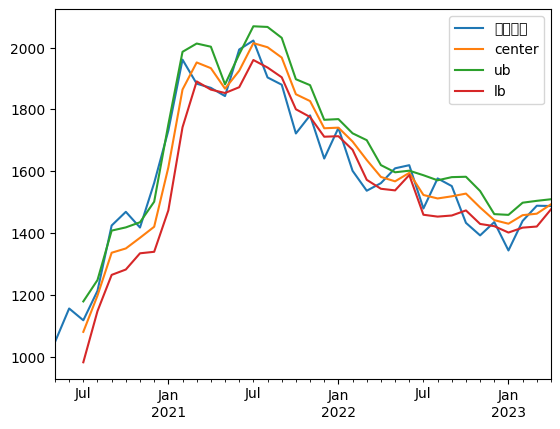

In [253]:
price_df.drop('예측종가', axis=1).plot()

In [254]:
start = '2020-07-01'
price_df2 = price_df.loc[start:]
price_df2.head(2)

,실제종가,예측종가,center,ub,lb
2020-07-01,1118.170000,1275.611035,1080.781240,1179.164237,982.398243
2020-08-01,1213.420000,1233.959921,1198.056354,1248.276580,1147.836127


In [255]:
# 거래 내역이라는 파생변수
price_df2['trade'] = ""
price_df2.head(1)

,실제종가,예측종가,center,ub,lb,trade
2020-07-01,1118.170000,1275.611035,1080.781240,1179.164237,982.398243,


In [256]:
for i in price_df2.index:
    if price_df2.loc[i, '예측종가'] > price_df2.loc[i, 'ub']:
        if price_df2.shift(1).loc[i, 'trade'] == 'buy':
            price_df2.loc[i, 'trade'] = ''
        else:
            price_df2.loc[i, 'trade'] = ''
    elif price_df2.loc[i, '예측종가'] < price_df2.loc[i, 'lb']:
        if price_df2.shift(1).loc[i, 'trade'] == 'buy':
            price_df2.loc[i, 'trade'] = 'buy'
        else:
            price_df2.loc[i, 'trade'] = 'buy'
    else:
        if price_df2.shift(1).loc[i, 'trade'] == 'buy':
            price_df2.loc[i, 'trade'] = 'buy'
        else:
            price_df2.loc[i, 'trade'] = ''

In [257]:
price_df2

,실제종가,예측종가,center,ub,lb,trade
2020-07-01,1118.170000,1275.611035,1080.781240,1179.164237,982.398243,
2020-08-01,1213.420000,1233.959921,1198.056354,1248.276580,1147.836127,
2020-09-01,1424.680000,1500.211939,1336.594299,1408.203923,1264.984674,
2020-10-01,1468.870000,1317.176433,1350.449431,1418.553861,1282.345001,
2020-11-01,1418.120000,1337.479199,1384.955857,1435.120645,1334.791069,
2020-12-01,1562.350000,1607.183327,1420.612986,1501.559604,1339.666369,
2021-01-01,1731.680000,1893.093402,1612.585310,1751.508554,1473.662065,
2021-02-01,1960.990000,2092.611453,1864.296061,1986.292046,1742.300076,
2021-03-01,1883.220000,1869.908654,1951.871170,2013.088515,1890.653824,buy
2021-04-01,1869.780000,1837.870234,1933.463447,2002.840462,1864.086432,buy


In [190]:
rtn = 1.0
price_df2['return'] = 1
buy = 0.0
sell = 0.0

for i in price_df2.index:
    if (price_df2.shift(1).loc[i, 'trade'] == '') and \
        (price_df2.loc[i, 'trade'] == 'buy'):
        buy = price_df2.loc[i, '예측종가']
        print('진입일:' , i, '구매 가격:' , buy)
    elif (price_df2.shift(1).loc[i, 'trade'] == 'buy') and \
        (price_df2.loc[i, 'trade'] == ''):
        sell = price_df2.loc[i, '예측종가']
        rtn = (sell -buy) / buy + 1
        price_df2.loc[i, 'return'] = rtn
        print('판매일:' , i, '판매 가격:' , sell, '수익율:', rtn)

    if price_df2.loc[i, 'trade'] == '':
        buy = 0.0
        sell = 0.0

진입일: 2020-11-01 00:00:00 구매 가격: 1337.479199372782
판매일: 2020-12-01 00:00:00 판매 가격: 1607.1833273227894 수익율: 1.2016510821824269
진입일: 2021-03-01 00:00:00 구매 가격: 1869.9086541494837
판매일: 2021-05-01 00:00:00 판매 가격: 1893.5742884071117 수익율: 1.0126560376118436
진입일: 2021-08-01 00:00:00 구매 가격: 1853.8030274776024
판매일: 2022-05-01 00:00:00 판매 가격: 1610.3792355030057 수익율: 0.8686895056451526
진입일: 2022-06-01 00:00:00 구매 가격: 1583.0955440896082
판매일: 2022-08-01 00:00:00 판매 가격: 1576.7048035720843 수익율: 0.9959631365640669
진입일: 2022-10-01 00:00:00 구매 가격: 1403.0981329267531
판매일: 2022-12-01 00:00:00 판매 가격: 1481.0318277356646 수익율: 1.055544008633486
진입일: 2023-01-01 00:00:00 구매 가격: 1368.464636924314
판매일: 2023-02-01 00:00:00 판매 가격: 1524.7486926600711 수익율: 1.114203941789108
진입일: 2023-04-01 00:00:00 구매 가격: 1459.4488253737072


In [191]:
# 누적 수익율
acc_rtn = 1.0

for i in price_df2.index:
    rtn = price_df2.loc[i, 'return']
    acc_rtn *= rtn
    price_df2.loc[i, 'acc_rtn'] = acc_rtn

print('누적 수익율: ', acc_rtn)

누적 수익율:  1.2381954764713372
